 1.DETERMINATION DE LA BANDE INTERDITE


 La bande interdite est dit indirecte car le minimum de la bande de conduction ne se situe pas sur le même vecteur d'onde que le maximum de la bande de valence. Il y a une transition de Z vers F lors du passage de la bande de valence à la bande de conduction. L'énergie pour passer d'une bande à l'autre est de  1.4748000000000006  eV. Cette énergie était faible. Notre matériaux est donc un semi conducteur.


Diagramme de la structure de bande:
-------------------------------------


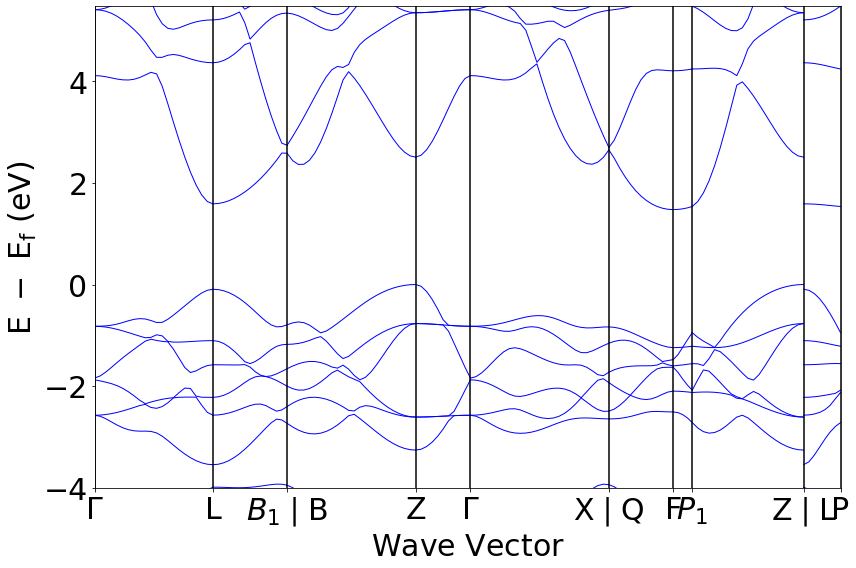

In [79]:
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.bandstructure import BandStructure
import numpy as np
with MPRester("z18b57ZwfPDtXJVD") as m: 
    bdstr = m.get_bandstructure_by_material_id("mp-755544")



print(" 1.DETERMINATION DE LA BANDE INTERDITE")
print('\n')
#Détermination de la bande interdite
bdgp = bdstr.get_band_gap()
print(" La bande interdite est dit indirecte car le minimum de la bande de conduction ne se situe pas sur le même vecteur d'onde que le maximum de la bande de valence. Il y a une transition de Z vers F lors du passage de la bande de valence à la bande de conduction. L'énergie pour passer d'une bande à l'autre est de ", bdgp['energy'], " eV. Cette énergie était faible. Notre matériaux est donc un semi conducteur.")
print('\n')
bplot=plotter.BSPlotter(bdstr)
print("Diagramme de la structure de bande du YTiO2:")
print("-------------------------------------")
bplot.show()

 2. DISPERSION


 La direction avec la plus forte dispersion est la direction qui observe la plus forte pente sur le graphe des bande d'énergie.
 A l'inverse, la direction avec la dispersion la plus faible est celle avec la pente la plus faible.


La pente la plus forte sur la dernière bande de valence est  2.621423003157871 . Ce qui correspond aux directions L-P ou Z-P (flèche rouge sur le graphe) car L et Z sont à la même distance de Γ. 


La pente la plus faible sur la dernière bande de valence est  0.010232770070370425 . Ce qui correspond aux directions Γ-X et Γ-Q (flèche jaune sur le graphe) car X et Q sont à la même distance de Γ. 


La pente la plus forte sur la dernière bande de conduction est  3.3210566855576156 . Ce qui correspond à la direction Z-Γ (flèche verte sur le graphe) 


La pente la plus faible sur la dernière bande de conduction est  0.06742929187065463 . Ce qui correspond aux directions B1-Z et B-Z (flèche mauve sur le graphe) 


Structures des bandes électronique

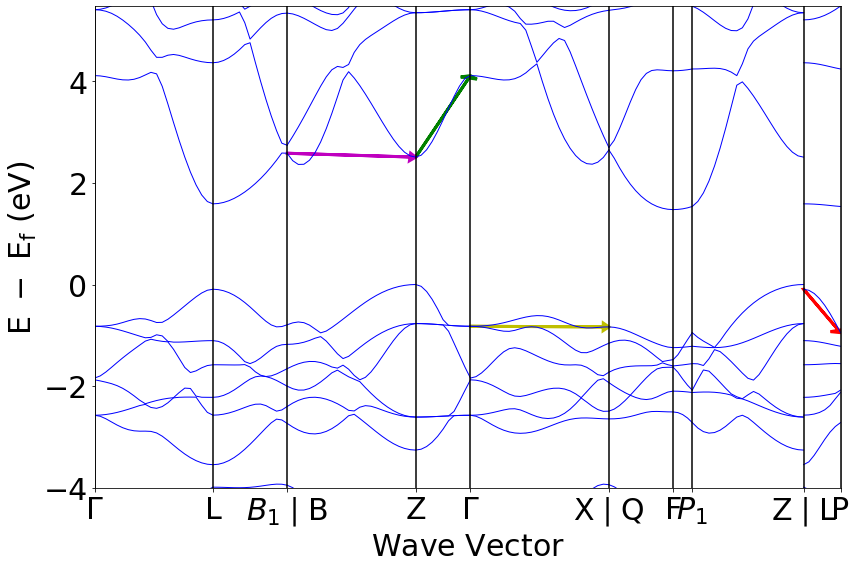

In [82]:
bandplot = BSPlotter(bdstr)
data = bandplot.bs_plot_data()
pl = bandplot.get_plot()

#Energie et distance des differentes bandes
en = data.get('energy')
D = data.get('ticks').get('distance')


#dernière bande de valence
vbm = bdstr.get_vbm() 

#première bande de conduction
cbm = bdstr.get_cbm()


last_Val = 17
first_Con = 18

dist = [D[1]-D[0] , D[3]-D[2] , D[4]-D[3] , D[6]-D[5] , D[8]-D[7] , D[9]-D[8] , D[11]-D[10], D[13]-D[12] , D[14]-D[13]]
pente_Val = np.zeros(9)
pente_Con = np.zeros(9)
for ii in range(0,9):
    pente_Val[ii] = abs(((en[ii].get('1')[last_Val])[-1] - (en[ii].get('1')[last_Val])[0])/(dist[ii]) )
    pente_Con[ii] = abs(((en[ii].get('1')[first_Con])[-1] - (en[ii].get('1')[first_Con])[0])/(dist[ii]) )

maxVal = np.amax(pente_Val) 
minVal = np.amin(pente_Val) 


maxCon = np.amax(pente_Con) 
minCon = np.amin(pente_Con) 
print(" 2. DISPERSION")
print('\n')
print(" La direction avec la plus forte dispersion est la direction qui observe la plus forte pente sur le graphe des bande d'énergie.")
print(" A l'inverse, la direction avec la dispersion la plus faible est celle avec la pente la plus faible.")
print('\n')
print("La pente la plus forte sur la dernière bande de valence est " , maxVal , ". Ce qui correspond aux directions L-P ou Z-P (flèche rouge sur le graphe) car L et Z sont à la même distance de Γ. ")
print('\n')
#dispersion maximale sur la bande de valence
plt.arrow(D[13], (en[8].get('1')[last_Val])[0],dist[8], (en[8].get('1')[last_Val])[-1] - (en[8].get('1')[last_Val])[0], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)


print("La pente la plus faible sur la dernière bande de valence est " , minVal , ". Ce qui correspond aux directions Γ-X et Γ-Q (flèche jaune sur le graphe) car X et Q sont à la même distance de Γ. ")
print('\n')
#dispersion minimale sur la bande de valence
plt.arrow(D[7], (en[4].get('1')[last_Val])[0],dist[4], (en[4].get('1')[last_Val])[-1] - (en[4].get('1')[last_Val])[0], head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)

print("La pente la plus forte sur la dernière bande de conduction est " , maxCon , ". Ce qui correspond à la direction Z-Γ (flèche verte sur le graphe) ")
print('\n')
#dispersion maximale sur la bande de conduction
plt.arrow(D[5], (en[3].get('1')[first_Con])[0],dist[3], (en[3].get('1')[first_Con])[-1] - (en[3].get('1')[first_Con])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)

print("La pente la plus faible sur la dernière bande de conduction est " , minCon , ". Ce qui correspond aux directions B1-Z et B-Z (flèche mauve sur le graphe) ")
print('\n')
#dispersion minimale sur la bande de conduction
plt.arrow(D[3], (en[2].get('1')[first_Con])[0],dist[2], (en[2].get('1')[first_Con])[-1] - (en[2].get('1')[first_Con])[0], head_width=0.15, head_length=0.05, linewidth=3, color='m', length_includes_head=True)



print("Structures des bandes électroniques du YTiO2:")
print("--------------------------------------")
plt.show()


Structures des bandes électroniques du CSO :


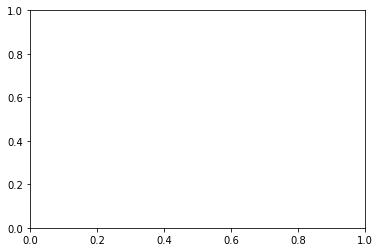